In [365]:
import timeit
import time
import math
import numba as nb
import numpy as np
import numexpr as ne
import pandas as pd
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

In [366]:
x = 2.0
%timeit x * 1.0

54.9 ns ± 4.16 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [367]:
def f_py_append(x_list, y_list):
    y_list = []
    for x in x_list:
        y_list.append(x * 2.0)
    return y_list

def f_py(x_list, y_list):
    for i in range(len(x_list)):
        y_list[i] = x_list[i] * 2.0
    return y_list

def f_py_listcompr(x_list, y_list):
    return [x * 2.0 for x in x_list]

In [368]:
def f_numpy(x_array, y_array):
    return x_array * 2.0

In [369]:
@nb.njit
def f_numba(x_array, y_array):
    for i in range(x_array.size):
        y_array[i] = x_array[i] * 2.0
    return y_array

@nb.njit(parallel=True)
def f_numba_parall(x_array, y_array):
    for i in nb.prange(x_array.size):
        y_array[i] = x_array[i] * 2.0
    return y_array

In [370]:
def f_numexpr(x_array, y_array):
    return ne.evaluate("x_array * 2.0")

In [377]:
funcs = [f_py_append, f_py, f_py_listcompr, f_numpy, f_numba, f_numba_parall, f_numexpr]
sizes = [100, 200, 500, 1_000, 2_000, 3_000, 5_000, 10_000, 20_000, 50_000, 100_000, 200_000, 500_000, 1_000_000]

In [386]:
addons = [0.0, 0.00001, 0.0001, 0.001]

In [379]:
times = np.zeros((len(sizes), len(funcs)))

In [381]:
N = 50

for i, s in enumerate(sizes):
    for j, f in enumerate(funcs):
        x_array = np.linspace(0, 1, num=s)
        y_array = np.empty_like(x_array)     
        if f.__name__.startswith('f_py'):
            x_array = x_array.tolist()
            y_array = y_array.tolist()
        times[i, j] = timeit.timeit("f(x_array, y_array)", globals=globals(), number=N) / N
        print(".", end="")
    print(s)

.......100
.......200
.......500
.......1000
.......2000
.......3000
.......5000
.......10000
.......20000
.......50000
.......100000
.......200000
.......500000
.......1000000


In [382]:
l = [pd.DataFrame({'name': f.__name__, 
                   'x': sizes, 
                   'y': times[:, j]
                  }) 
     for j, f in enumerate(funcs)]
df = pd.concat(l)

In [383]:
fig = px.line(df, x='x', y='y', color='name', 
              log_x=True, log_y=True, markers=True)
fig.show()

In [387]:
for t in addons:
    l = [pd.DataFrame({'name': f.__name__, 
                       'x': sizes, 
                       'y': times[:, j] + t
                      }) 
        for j, f in enumerate(funcs)]
    df = pd.concat(l)
    px.line(df, x='x', y='y', color='name', title=f'extra time per point: {t}', log_x=True, log_y=True, markers=True).show()

In [389]:
0.00001 * 2000 

0.02

In [97]:
#fig.update_xaxes(range=[10000,1000000])
fig.update_layout(yaxis_range=[1,10])
fig.show()

In [19]:
fig = px.line(x=sizes , y=times[:, :])
#fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])

ValueError: All arguments should have the same length. The length of argument `wide_variable_0` is 7, whereas the length of  previously-processed arguments ['x'] is 8

In [20]:
fig.show()

In [11]:
fig, ax = plt.subplots()
for j, f in enumerate(funcs):
    ax.plot(sizes, times[:, j], label=f.__name__)
ax.set_xlabel("Array size")
ax.set_ylabel("Time per function call (s)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()
ax.grid()
#fig.tight_layout()

In [9]:
plt.xlim([1e4, 1e6])
plt.ylim([1e-4, 1])

(0.0001, 1)

<IPython.core.display.Javascript object>


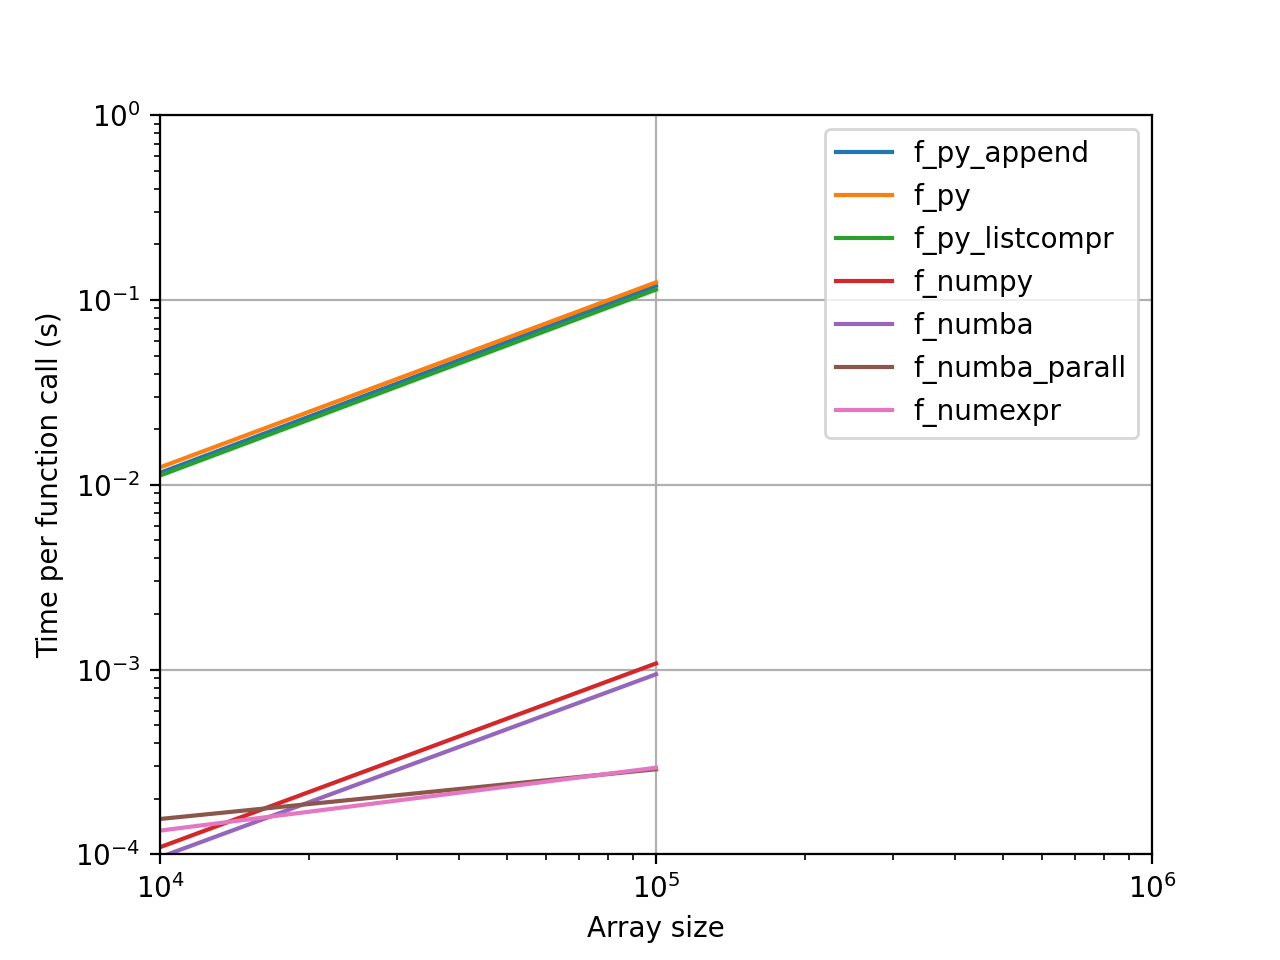

In [10]:
fig

In [ ]:
plt.xlim([1e4, 1e6])
plt.ylim([1e-4, 1])
fig.tight_layout()